In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# There was something Jocelyn did to modify the image sizes without modifying the dtype
size = 7
train_data = datasets.MNIST(
    root = '../data/7x7',
    train = True,                         
    transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Resize(size),
                    transforms.Normalize(0, 1)
                ]), 
    download = True,            
)
test_data = datasets.MNIST(
    root = '../data/7x7', 
    train = False, 
    transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Resize(size),
                    transforms.Normalize(0, 1)
                ]),
    download = False,
)

/Users/cristianespinosa/opt/anaconda3/envs/tensor/lib/python3.6/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1631631159818/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


<h3>MNIST Dataset is organized by:</h3>
<div>Set of images (with channels) and labels --> train_data</div>
<div>image (with channels) AND label --> train_data[i (0,59999)]</div>
<div>image (with channels) --> train_data[i][i (0,1)]</div>
<div>image by itself (2D image) --> train_data[i][i][i (0)]</div>

In [3]:
# Images and labels are stored as a tuple (image, label)

print(len(train_data[0]), '\n\n')
print(train_data[0])

2 


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.1275, 0.5314, 0.7735, 0.9206, 0.0000],
         [0.0000, 0.0000, 0.2725, 0.3000, 0.1510, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.7716, 0.1422, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0451, 0.9882, 0.0000, 0.0000],
         [0.0000, 0.0176, 0.7696, 0.7657, 0.0020, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]]), 5)


In [4]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.1275, 0.5314, 0.7735, 0.9206, 0.0000],
          [0.0000, 0.0000, 0.2725, 0.3000, 0.1510, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.7716, 0.1422, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0451, 0.9882, 0.0000, 0.0000],
          [0.0000, 0.0176, 0.7696, 0.7657, 0.0020, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]]), 5)

In [5]:
train_data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.1275, 0.5314, 0.7735, 0.9206, 0.0000],
         [0.0000, 0.0000, 0.2725, 0.3000, 0.1510, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.7716, 0.1422, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0451, 0.9882, 0.0000, 0.0000],
         [0.0000, 0.0176, 0.7696, 0.7657, 0.0020, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]])

In [6]:
# Prints the entire dataset
train_data[0][0].shape

torch.Size([1, 7, 7])

In [7]:
# Prints one image
train_data[0][0][0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1275, 0.5314, 0.7735, 0.9206, 0.0000],
        [0.0000, 0.0000, 0.2725, 0.3000, 0.1510, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.7716, 0.1422, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0451, 0.9882, 0.0000, 0.0000],
        [0.0000, 0.0176, 0.7696, 0.7657, 0.0020, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])

In [8]:
# Prints one array of pixels (not the entire image)
train_data[0][0][0][0]

tensor([0., 0., 0., 0., 0., 0., 0.])

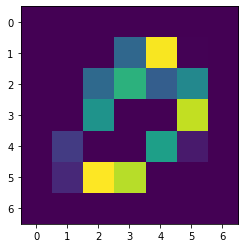

In [9]:
plt.imshow(train_data[1][0][0])

In [10]:
transforms.Resize(size=14)(train_data.data)

tensor([[[  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,  94,   0,   0],
         ...,
         [  0,   0,  57,  ...,   0,   0,   0],
         [  0,   0,  97,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        [[  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         ...,
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        [[  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,  10,   0,   0],
         ...,
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        ...,

        [[  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]

In [11]:
type(train_data)

torchvision.datasets.mnist.MNIST

/Users/cristianespinosa/opt/anaconda3/envs/tensor/lib/python3.6/site-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


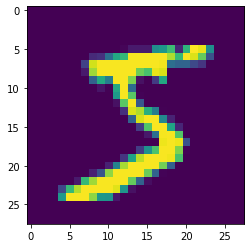

In [12]:
plt.imshow(train_data.train_data[0])

In [13]:
# Resize(size[, interpolation, max_size, …])

/Users/cristianespinosa/opt/anaconda3/envs/tensor/lib/python3.6/site-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


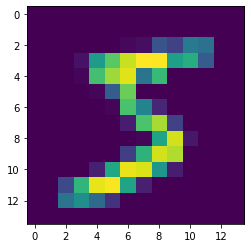

In [14]:
resized = transforms.Resize(size=14)(train_data.train_data)
plt.imshow(resized[0])

In [15]:
type(resized)

torch.Tensor

In [16]:
resized_28 = transforms.Resize(size=28)(train_data.train_data)
resized_14 = transforms.Resize(size=14)(train_data.train_data)
resized_7 = transforms.Resize(size=7)(train_data.train_data)
resized_4 = transforms.Resize(size=4)(train_data.train_data)

/Users/cristianespinosa/opt/anaconda3/envs/tensor/lib/python3.6/site-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


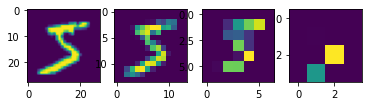

In [17]:
f, axarr = plt.subplots(1,4)
axarr[0].imshow(resized_28[0])
axarr[1].imshow(resized_14[0])
axarr[2].imshow(resized_7[0])
axarr[3].imshow(resized_4[0])

<h1>Using Pytorch's Data loaders to feed data into CNN</h1>

In [18]:
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7fcfd7434d30>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7fcff9eb3240>}

<h1>Defining the CNN</h1>

In [19]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        '''
        Goes through two layers of 2D convolutions, each followed by a 2x2 max pooling
        
        Dimensions:
        1.) Input Shape:          [batch_size, 1, 7, 7]
        
        2.) After conv:           [batch_size, 4, 6, 6]
            After max pooling:    [batch_size, 4, 3, 3]
        
        3.) After conv:           [batch_size, 8, 2, 2]
            After max pooling:    [batch_size, 8, 1, 1]
            
        4.) After flattening:     [batch_size, 8 * 1 * 1]
        '''
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=4,            
                kernel_size=2,              
                stride=1,                   
                padding=0,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(4, 8, 2, 1, 0),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(8 * 1 * 1, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 16 * 8 * 8)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # return x for visualization
    
    
    def compute_sizes(in_size, ker_size, padding, stride):
        pass

In [20]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 4, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(4, 8, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=8, out_features=10, bias=True)
)


In [21]:
loss_func = nn.CrossEntropyLoss(); print(loss_func)   
optimizer = torch.optim.Adam(cnn.parameters(), lr= 1e-5); print(optimizer)

CrossEntropyLoss()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 1e-05
    weight_decay: 0
)


<h1>Training the CNN</h1>
<div>Error source may be that the dataset resized_28 doesn't have 'labels', just 'images' ---> (for i, (images, labels))</div>

In [22]:
num_epochs = 300
train_acc_data = []
loss_data = []

def train(num_epochs, cnn, loaders):
    cnn.train()
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0]               
            loss = loss_func(output, b_y)
            
            # measure accuracy and record loss
            train_output, last_layer = cnn(images)
            pred_y = torch.max(train_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()  
#             output = cnn(images)
#             correct += (output == labels).float().sum()
#             accuracy = 100 * correct / len(trainset)
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(), accuracy))
            
            if(i+1) % 600 == 0:
                train_acc_data.append(accuracy)
                loss_data.append(loss)
            pass
        
        pass
    
    
    pass
    
train(num_epochs, cnn, loaders)

Epoch [1/300], Step [100/600], Loss: 2.3441, Accuracy: 0.1100
Epoch [1/300], Step [200/600], Loss: 2.3599, Accuracy: 0.0900
Epoch [1/300], Step [300/600], Loss: 2.3396, Accuracy: 0.1000
Epoch [1/300], Step [400/600], Loss: 2.3593, Accuracy: 0.0500
Epoch [1/300], Step [500/600], Loss: 2.3657, Accuracy: 0.0600
Epoch [1/300], Step [600/600], Loss: 2.3488, Accuracy: 0.1000
Epoch [2/300], Step [100/600], Loss: 2.3270, Accuracy: 0.0900
Epoch [2/300], Step [200/600], Loss: 2.3163, Accuracy: 0.1000
Epoch [2/300], Step [300/600], Loss: 2.3083, Accuracy: 0.1100
Epoch [2/300], Step [400/600], Loss: 2.3319, Accuracy: 0.1300
Epoch [2/300], Step [500/600], Loss: 2.3444, Accuracy: 0.0600
Epoch [2/300], Step [600/600], Loss: 2.3667, Accuracy: 0.0800
Epoch [3/300], Step [100/600], Loss: 2.3277, Accuracy: 0.1200
Epoch [3/300], Step [200/600], Loss: 2.3502, Accuracy: 0.0700
Epoch [3/300], Step [300/600], Loss: 2.3213, Accuracy: 0.1000
Epoch [3/300], Step [400/600], Loss: 2.3095, Accuracy: 0.1200
Epoch [3

Epoch [22/300], Step [600/600], Loss: 2.2707, Accuracy: 0.2400
Epoch [23/300], Step [100/600], Loss: 2.2707, Accuracy: 0.2500
Epoch [23/300], Step [200/600], Loss: 2.2582, Accuracy: 0.2300
Epoch [23/300], Step [300/600], Loss: 2.2792, Accuracy: 0.2100
Epoch [23/300], Step [400/600], Loss: 2.2673, Accuracy: 0.1900
Epoch [23/300], Step [500/600], Loss: 2.2715, Accuracy: 0.1900
Epoch [23/300], Step [600/600], Loss: 2.2519, Accuracy: 0.2300
Epoch [24/300], Step [100/600], Loss: 2.2665, Accuracy: 0.1600
Epoch [24/300], Step [200/600], Loss: 2.2789, Accuracy: 0.1900
Epoch [24/300], Step [300/600], Loss: 2.2620, Accuracy: 0.2300
Epoch [24/300], Step [400/600], Loss: 2.2758, Accuracy: 0.1900
Epoch [24/300], Step [500/600], Loss: 2.3013, Accuracy: 0.1500
Epoch [24/300], Step [600/600], Loss: 2.2554, Accuracy: 0.1700
Epoch [25/300], Step [100/600], Loss: 2.2580, Accuracy: 0.2000
Epoch [25/300], Step [200/600], Loss: 2.2818, Accuracy: 0.1500
Epoch [25/300], Step [300/600], Loss: 2.2586, Accuracy:

Epoch [44/300], Step [500/600], Loss: 2.2209, Accuracy: 0.3000
Epoch [44/300], Step [600/600], Loss: 2.2120, Accuracy: 0.3300
Epoch [45/300], Step [100/600], Loss: 2.1964, Accuracy: 0.3400
Epoch [45/300], Step [200/600], Loss: 2.2159, Accuracy: 0.2300
Epoch [45/300], Step [300/600], Loss: 2.2051, Accuracy: 0.2300
Epoch [45/300], Step [400/600], Loss: 2.2114, Accuracy: 0.2300
Epoch [45/300], Step [500/600], Loss: 2.2190, Accuracy: 0.3000
Epoch [45/300], Step [600/600], Loss: 2.2154, Accuracy: 0.2000
Epoch [46/300], Step [100/600], Loss: 2.1693, Accuracy: 0.3300
Epoch [46/300], Step [200/600], Loss: 2.2010, Accuracy: 0.2900
Epoch [46/300], Step [300/600], Loss: 2.2260, Accuracy: 0.1800
Epoch [46/300], Step [400/600], Loss: 2.1915, Accuracy: 0.2500
Epoch [46/300], Step [500/600], Loss: 2.2317, Accuracy: 0.2200
Epoch [46/300], Step [600/600], Loss: 2.2151, Accuracy: 0.2400
Epoch [47/300], Step [100/600], Loss: 2.2283, Accuracy: 0.2200
Epoch [47/300], Step [200/600], Loss: 2.1945, Accuracy:

Epoch [66/300], Step [400/600], Loss: 2.1032, Accuracy: 0.2900
Epoch [66/300], Step [500/600], Loss: 2.0959, Accuracy: 0.3200
Epoch [66/300], Step [600/600], Loss: 2.1148, Accuracy: 0.2800
Epoch [67/300], Step [100/600], Loss: 2.0827, Accuracy: 0.3700
Epoch [67/300], Step [200/600], Loss: 2.0892, Accuracy: 0.2800
Epoch [67/300], Step [300/600], Loss: 2.1054, Accuracy: 0.3700
Epoch [67/300], Step [400/600], Loss: 2.1248, Accuracy: 0.3400
Epoch [67/300], Step [500/600], Loss: 2.1186, Accuracy: 0.3000
Epoch [67/300], Step [600/600], Loss: 2.0884, Accuracy: 0.3500
Epoch [68/300], Step [100/600], Loss: 2.0877, Accuracy: 0.3800
Epoch [68/300], Step [200/600], Loss: 2.1054, Accuracy: 0.3200
Epoch [68/300], Step [300/600], Loss: 2.1228, Accuracy: 0.3300
Epoch [68/300], Step [400/600], Loss: 2.0912, Accuracy: 0.3400
Epoch [68/300], Step [500/600], Loss: 2.0788, Accuracy: 0.2700
Epoch [68/300], Step [600/600], Loss: 2.1123, Accuracy: 0.2800
Epoch [69/300], Step [100/600], Loss: 2.0874, Accuracy:

Epoch [88/300], Step [300/600], Loss: 1.9864, Accuracy: 0.3800
Epoch [88/300], Step [400/600], Loss: 2.0579, Accuracy: 0.2800
Epoch [88/300], Step [500/600], Loss: 2.0336, Accuracy: 0.3100
Epoch [88/300], Step [600/600], Loss: 2.0345, Accuracy: 0.2800
Epoch [89/300], Step [100/600], Loss: 2.0084, Accuracy: 0.3300
Epoch [89/300], Step [200/600], Loss: 2.0373, Accuracy: 0.2700
Epoch [89/300], Step [300/600], Loss: 1.9938, Accuracy: 0.3500
Epoch [89/300], Step [400/600], Loss: 1.9241, Accuracy: 0.4800
Epoch [89/300], Step [500/600], Loss: 2.0257, Accuracy: 0.3500
Epoch [89/300], Step [600/600], Loss: 1.9630, Accuracy: 0.3800
Epoch [90/300], Step [100/600], Loss: 1.9668, Accuracy: 0.3100
Epoch [90/300], Step [200/600], Loss: 2.0495, Accuracy: 0.2400
Epoch [90/300], Step [300/600], Loss: 2.0129, Accuracy: 0.4200
Epoch [90/300], Step [400/600], Loss: 2.0219, Accuracy: 0.3300
Epoch [90/300], Step [500/600], Loss: 1.9723, Accuracy: 0.3200
Epoch [90/300], Step [600/600], Loss: 1.9825, Accuracy:

Epoch [110/300], Step [100/600], Loss: 1.8727, Accuracy: 0.4300
Epoch [110/300], Step [200/600], Loss: 1.9204, Accuracy: 0.3300
Epoch [110/300], Step [300/600], Loss: 1.8215, Accuracy: 0.3800
Epoch [110/300], Step [400/600], Loss: 1.9151, Accuracy: 0.4000
Epoch [110/300], Step [500/600], Loss: 1.9137, Accuracy: 0.3000
Epoch [110/300], Step [600/600], Loss: 1.8710, Accuracy: 0.3700
Epoch [111/300], Step [100/600], Loss: 1.8231, Accuracy: 0.3900
Epoch [111/300], Step [200/600], Loss: 1.8865, Accuracy: 0.3400
Epoch [111/300], Step [300/600], Loss: 1.9219, Accuracy: 0.3200
Epoch [111/300], Step [400/600], Loss: 1.8483, Accuracy: 0.4100
Epoch [111/300], Step [500/600], Loss: 1.7995, Accuracy: 0.4000
Epoch [111/300], Step [600/600], Loss: 1.8644, Accuracy: 0.3800
Epoch [112/300], Step [100/600], Loss: 1.8957, Accuracy: 0.4000
Epoch [112/300], Step [200/600], Loss: 1.8986, Accuracy: 0.2700
Epoch [112/300], Step [300/600], Loss: 1.8856, Accuracy: 0.3400
Epoch [112/300], Step [400/600], Loss: 1

Epoch [131/300], Step [400/600], Loss: 1.8149, Accuracy: 0.4800
Epoch [131/300], Step [500/600], Loss: 1.6834, Accuracy: 0.3800
Epoch [131/300], Step [600/600], Loss: 1.8031, Accuracy: 0.4200
Epoch [132/300], Step [100/600], Loss: 1.6773, Accuracy: 0.4100
Epoch [132/300], Step [200/600], Loss: 1.8158, Accuracy: 0.3900
Epoch [132/300], Step [300/600], Loss: 1.6078, Accuracy: 0.4100
Epoch [132/300], Step [400/600], Loss: 1.8397, Accuracy: 0.3900
Epoch [132/300], Step [500/600], Loss: 1.7867, Accuracy: 0.3800
Epoch [132/300], Step [600/600], Loss: 1.8103, Accuracy: 0.4100
Epoch [133/300], Step [100/600], Loss: 1.8595, Accuracy: 0.2800
Epoch [133/300], Step [200/600], Loss: 1.7402, Accuracy: 0.3800
Epoch [133/300], Step [300/600], Loss: 1.7231, Accuracy: 0.4100
Epoch [133/300], Step [400/600], Loss: 1.7579, Accuracy: 0.4200
Epoch [133/300], Step [500/600], Loss: 1.8167, Accuracy: 0.4400
Epoch [133/300], Step [600/600], Loss: 1.7574, Accuracy: 0.3800
Epoch [134/300], Step [100/600], Loss: 1

Epoch [153/300], Step [100/600], Loss: 1.7091, Accuracy: 0.4400
Epoch [153/300], Step [200/600], Loss: 1.6804, Accuracy: 0.4000
Epoch [153/300], Step [300/600], Loss: 1.6667, Accuracy: 0.4700
Epoch [153/300], Step [400/600], Loss: 1.6055, Accuracy: 0.5100
Epoch [153/300], Step [500/600], Loss: 1.7351, Accuracy: 0.4200
Epoch [153/300], Step [600/600], Loss: 1.8464, Accuracy: 0.3500
Epoch [154/300], Step [100/600], Loss: 1.7430, Accuracy: 0.4200
Epoch [154/300], Step [200/600], Loss: 1.7112, Accuracy: 0.4300
Epoch [154/300], Step [300/600], Loss: 1.7994, Accuracy: 0.3700
Epoch [154/300], Step [400/600], Loss: 1.6913, Accuracy: 0.4400
Epoch [154/300], Step [500/600], Loss: 1.6380, Accuracy: 0.4000
Epoch [154/300], Step [600/600], Loss: 1.7969, Accuracy: 0.4000
Epoch [155/300], Step [100/600], Loss: 1.7709, Accuracy: 0.4200
Epoch [155/300], Step [200/600], Loss: 1.7837, Accuracy: 0.3800
Epoch [155/300], Step [300/600], Loss: 1.6601, Accuracy: 0.4000
Epoch [155/300], Step [400/600], Loss: 1

Epoch [174/300], Step [400/600], Loss: 1.6383, Accuracy: 0.4800
Epoch [174/300], Step [500/600], Loss: 1.5214, Accuracy: 0.4600
Epoch [174/300], Step [600/600], Loss: 1.6517, Accuracy: 0.4300
Epoch [175/300], Step [100/600], Loss: 1.7330, Accuracy: 0.4500
Epoch [175/300], Step [200/600], Loss: 1.6663, Accuracy: 0.3800
Epoch [175/300], Step [300/600], Loss: 1.5929, Accuracy: 0.4900
Epoch [175/300], Step [400/600], Loss: 1.6167, Accuracy: 0.4400
Epoch [175/300], Step [500/600], Loss: 1.8098, Accuracy: 0.3500
Epoch [175/300], Step [600/600], Loss: 1.6978, Accuracy: 0.4000
Epoch [176/300], Step [100/600], Loss: 1.7565, Accuracy: 0.4000
Epoch [176/300], Step [200/600], Loss: 1.6024, Accuracy: 0.4700
Epoch [176/300], Step [300/600], Loss: 1.5895, Accuracy: 0.4800
Epoch [176/300], Step [400/600], Loss: 1.6854, Accuracy: 0.3600
Epoch [176/300], Step [500/600], Loss: 1.7516, Accuracy: 0.4600
Epoch [176/300], Step [600/600], Loss: 1.6349, Accuracy: 0.4600
Epoch [177/300], Step [100/600], Loss: 1

Epoch [196/300], Step [100/600], Loss: 1.6110, Accuracy: 0.4200
Epoch [196/300], Step [200/600], Loss: 1.4991, Accuracy: 0.5100
Epoch [196/300], Step [300/600], Loss: 1.4577, Accuracy: 0.5600
Epoch [196/300], Step [400/600], Loss: 1.6015, Accuracy: 0.4200
Epoch [196/300], Step [500/600], Loss: 1.3967, Accuracy: 0.4700
Epoch [196/300], Step [600/600], Loss: 1.4851, Accuracy: 0.5000
Epoch [197/300], Step [100/600], Loss: 1.7122, Accuracy: 0.4500
Epoch [197/300], Step [200/600], Loss: 1.5416, Accuracy: 0.4400
Epoch [197/300], Step [300/600], Loss: 1.4358, Accuracy: 0.4900
Epoch [197/300], Step [400/600], Loss: 1.5553, Accuracy: 0.4800
Epoch [197/300], Step [500/600], Loss: 1.5799, Accuracy: 0.4800
Epoch [197/300], Step [600/600], Loss: 1.5143, Accuracy: 0.4500
Epoch [198/300], Step [100/600], Loss: 1.5081, Accuracy: 0.5100
Epoch [198/300], Step [200/600], Loss: 1.4259, Accuracy: 0.5400
Epoch [198/300], Step [300/600], Loss: 1.6377, Accuracy: 0.4200
Epoch [198/300], Step [400/600], Loss: 1

Epoch [217/300], Step [400/600], Loss: 1.4718, Accuracy: 0.4700
Epoch [217/300], Step [500/600], Loss: 1.4749, Accuracy: 0.5200
Epoch [217/300], Step [600/600], Loss: 1.6164, Accuracy: 0.4400
Epoch [218/300], Step [100/600], Loss: 1.5529, Accuracy: 0.4800
Epoch [218/300], Step [200/600], Loss: 1.5142, Accuracy: 0.4800
Epoch [218/300], Step [300/600], Loss: 1.4584, Accuracy: 0.5100
Epoch [218/300], Step [400/600], Loss: 1.4771, Accuracy: 0.5000
Epoch [218/300], Step [500/600], Loss: 1.3603, Accuracy: 0.5700
Epoch [218/300], Step [600/600], Loss: 1.5848, Accuracy: 0.4300
Epoch [219/300], Step [100/600], Loss: 1.5572, Accuracy: 0.4700
Epoch [219/300], Step [200/600], Loss: 1.5931, Accuracy: 0.5100
Epoch [219/300], Step [300/600], Loss: 1.5840, Accuracy: 0.4100
Epoch [219/300], Step [400/600], Loss: 1.4810, Accuracy: 0.4900
Epoch [219/300], Step [500/600], Loss: 1.4574, Accuracy: 0.5000
Epoch [219/300], Step [600/600], Loss: 1.5398, Accuracy: 0.5000
Epoch [220/300], Step [100/600], Loss: 1

Epoch [239/300], Step [100/600], Loss: 1.4033, Accuracy: 0.5100
Epoch [239/300], Step [200/600], Loss: 1.4060, Accuracy: 0.5600
Epoch [239/300], Step [300/600], Loss: 1.4285, Accuracy: 0.5000
Epoch [239/300], Step [400/600], Loss: 1.4764, Accuracy: 0.5000
Epoch [239/300], Step [500/600], Loss: 1.4980, Accuracy: 0.4200
Epoch [239/300], Step [600/600], Loss: 1.5238, Accuracy: 0.5000
Epoch [240/300], Step [100/600], Loss: 1.4925, Accuracy: 0.4800
Epoch [240/300], Step [200/600], Loss: 1.4790, Accuracy: 0.5300
Epoch [240/300], Step [300/600], Loss: 1.4490, Accuracy: 0.5300
Epoch [240/300], Step [400/600], Loss: 1.3410, Accuracy: 0.4800
Epoch [240/300], Step [500/600], Loss: 1.4134, Accuracy: 0.5400
Epoch [240/300], Step [600/600], Loss: 1.4735, Accuracy: 0.4900
Epoch [241/300], Step [100/600], Loss: 1.3765, Accuracy: 0.5000
Epoch [241/300], Step [200/600], Loss: 1.4566, Accuracy: 0.5300
Epoch [241/300], Step [300/600], Loss: 1.5591, Accuracy: 0.5200
Epoch [241/300], Step [400/600], Loss: 1

Epoch [260/300], Step [400/600], Loss: 1.3709, Accuracy: 0.5400
Epoch [260/300], Step [500/600], Loss: 1.4775, Accuracy: 0.5100
Epoch [260/300], Step [600/600], Loss: 1.4195, Accuracy: 0.5700
Epoch [261/300], Step [100/600], Loss: 1.4365, Accuracy: 0.5000
Epoch [261/300], Step [200/600], Loss: 1.5481, Accuracy: 0.4400
Epoch [261/300], Step [300/600], Loss: 1.3638, Accuracy: 0.5600
Epoch [261/300], Step [400/600], Loss: 1.3525, Accuracy: 0.5100
Epoch [261/300], Step [500/600], Loss: 1.4176, Accuracy: 0.4700
Epoch [261/300], Step [600/600], Loss: 1.5191, Accuracy: 0.4600
Epoch [262/300], Step [100/600], Loss: 1.4485, Accuracy: 0.5200
Epoch [262/300], Step [200/600], Loss: 1.2596, Accuracy: 0.5600
Epoch [262/300], Step [300/600], Loss: 1.4536, Accuracy: 0.5000
Epoch [262/300], Step [400/600], Loss: 1.3902, Accuracy: 0.4900
Epoch [262/300], Step [500/600], Loss: 1.3678, Accuracy: 0.4800
Epoch [262/300], Step [600/600], Loss: 1.3477, Accuracy: 0.5400
Epoch [263/300], Step [100/600], Loss: 1

Epoch [282/300], Step [100/600], Loss: 1.3972, Accuracy: 0.5300
Epoch [282/300], Step [200/600], Loss: 1.4317, Accuracy: 0.4900
Epoch [282/300], Step [300/600], Loss: 1.2731, Accuracy: 0.5400
Epoch [282/300], Step [400/600], Loss: 1.3219, Accuracy: 0.5300
Epoch [282/300], Step [500/600], Loss: 1.1641, Accuracy: 0.5800
Epoch [282/300], Step [600/600], Loss: 1.2826, Accuracy: 0.5500
Epoch [283/300], Step [100/600], Loss: 1.2557, Accuracy: 0.5300
Epoch [283/300], Step [200/600], Loss: 1.3340, Accuracy: 0.5300
Epoch [283/300], Step [300/600], Loss: 1.3282, Accuracy: 0.5800
Epoch [283/300], Step [400/600], Loss: 1.5096, Accuracy: 0.4600
Epoch [283/300], Step [500/600], Loss: 1.4238, Accuracy: 0.5300
Epoch [283/300], Step [600/600], Loss: 1.3819, Accuracy: 0.5200
Epoch [284/300], Step [100/600], Loss: 1.3595, Accuracy: 0.5300
Epoch [284/300], Step [200/600], Loss: 1.4614, Accuracy: 0.5200
Epoch [284/300], Step [300/600], Loss: 1.3925, Accuracy: 0.5500
Epoch [284/300], Step [400/600], Loss: 1

In [23]:
test_acc_data = []

def test():
    cnn.eval()
        
    # Train the model
    correct = 0
    total = 0
    for images, labels in loaders['test']:
        test_output, last_layer = cnn(images)
        pred_y = torch.max(test_output, 1)[1].data.squeeze()
        accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
        test_acc_data.append(accuracy)
        print("Accuracy: {:.4f}".format(accuracy))
        
#     print('Test Accuracy: %.2f' % accuracy)
    
test()

Accuracy: 0.5200
Accuracy: 0.5100
Accuracy: 0.4800
Accuracy: 0.5400
Accuracy: 0.6400
Accuracy: 0.6100
Accuracy: 0.5100
Accuracy: 0.4700
Accuracy: 0.4700
Accuracy: 0.5700
Accuracy: 0.5400
Accuracy: 0.5100
Accuracy: 0.5100
Accuracy: 0.5000
Accuracy: 0.5300
Accuracy: 0.5100
Accuracy: 0.5000
Accuracy: 0.5200
Accuracy: 0.5500
Accuracy: 0.5400
Accuracy: 0.5600
Accuracy: 0.5200
Accuracy: 0.5500
Accuracy: 0.6000
Accuracy: 0.5500
Accuracy: 0.5100
Accuracy: 0.4600
Accuracy: 0.5000
Accuracy: 0.5700
Accuracy: 0.5100
Accuracy: 0.4900
Accuracy: 0.5200
Accuracy: 0.5300
Accuracy: 0.5800
Accuracy: 0.5200
Accuracy: 0.5200
Accuracy: 0.4600
Accuracy: 0.5100
Accuracy: 0.5700
Accuracy: 0.4700
Accuracy: 0.5200
Accuracy: 0.5000
Accuracy: 0.5800
Accuracy: 0.4700
Accuracy: 0.5600
Accuracy: 0.5400
Accuracy: 0.5900
Accuracy: 0.5100
Accuracy: 0.5700
Accuracy: 0.5200
Accuracy: 0.5200
Accuracy: 0.5400
Accuracy: 0.5700
Accuracy: 0.4600
Accuracy: 0.4800
Accuracy: 0.5600
Accuracy: 0.5600
Accuracy: 0.4700
Accuracy: 0.46

In [24]:
# for i in range(len(acc_data)):
#     if acc_data[i] == 0.71:
#         print("fount at ", i)

# acc_data[600-1]

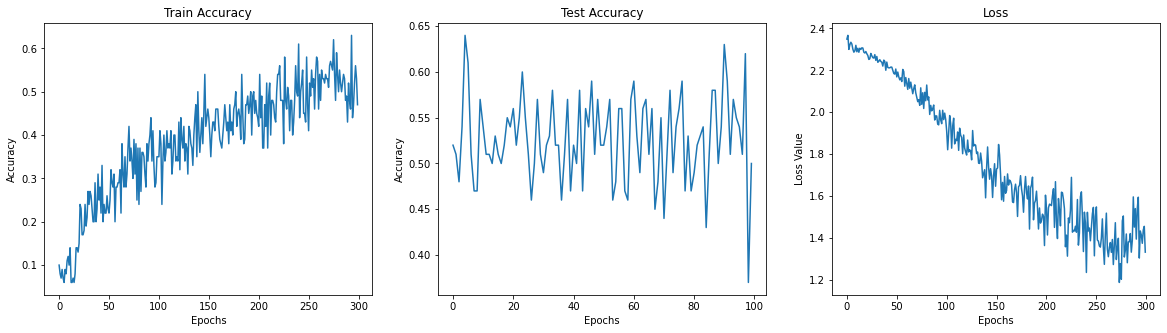

In [36]:
f, axarr = plt.subplots(1,3, figsize=(20, 5))
axarr[0].set_title("Train Accuracy")
axarr[0].set_xlabel("Epochs")
axarr[0].set_ylabel("Accuracy")
axarr[0].plot(train_acc_data)

axarr[1].set_title("Test Accuracy")
axarr[1].set_xlabel("Epochs")
axarr[1].set_ylabel("Accuracy")
axarr[1].plot(test_acc_data)


axarr[2].set_title("Loss")
axarr[2].set_xlabel("Epochs")
axarr[2].set_ylabel("Loss Value")
axarr[2].plot(loss_data)

In [26]:
cnn.train()
len(loaders['train'])

600

In [27]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [28]:
type(resized_28)

torch.Tensor

In [29]:
# for i, image in enumerate(loaders['train']):
#     print(i, image.shape)

<h1>Attempting to resize the dataset when importing with datasets.MNIST</h1>

In [30]:
# train_data = datasets.MNIST(
#     root = 'data',
#     train = True,                         
#     transform = transforms.Compose([
#                     transforms.ToTensor(),
#                     transforms.Resize(size=14)(train_data.data),
#                     transforms.Normalize(0, 1)
#                 ]), 
#     download = True,            
# )
# test_data = datasets.MNIST(
#     root = 'data', 
#     train = False, 
#     transform = transforms.Compose([
#                     transforms.ToTensor(),
#                     transforms.Resize(size=14)(test_data.data),
#                     transforms.Normalize(0, 1)
#                 ]) 
# )

In [31]:
train_data.data.shape

torch.Size([60000, 28, 28])

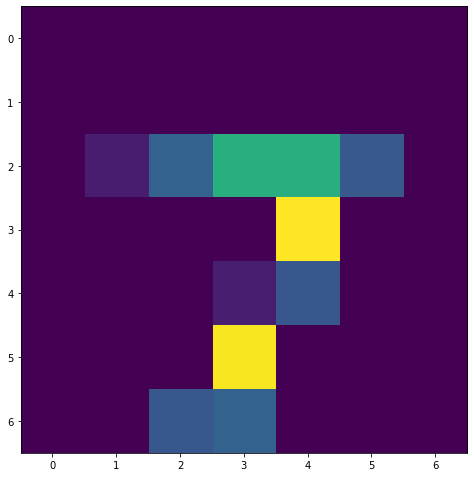

In [32]:
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(30)
plt.imshow(test_data[0][0][0])

In [35]:
len(train_acc_data)

300